In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os



In [61]:
df = pd.read_csv('nobel prize.csv')
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France


In [62]:
def bar_chart(df,para_1):
    country = df[para_1].value_counts();
    x_list = [] ; y_list = [];
    j = 0;
    for i in country.index:
        x_list.append(i)
        selectTemp = df[df[para_1] == i]
        y_list.append(selectTemp[para_1].count())
        j += 1
        if j == 9:
            break
    plt.figure(figsize=(8,5))
    plt.bar(x_list, y_list, color='#007acc', alpha=0.5, align="center",width = 0.5, edgecolor='blue')
    plt.xlabel("Country",fontsize=12);
    plt.ylabel("Number of Winners",fontsize=12);
    plt.xticks(rotation = 90);
    plt.tight_layout();
    bar_output_plot = 'mitch_output/'+para_1 +'.png'
    plt.savefig(bar_output_plot, dpi=300,bbox_inches='tight')


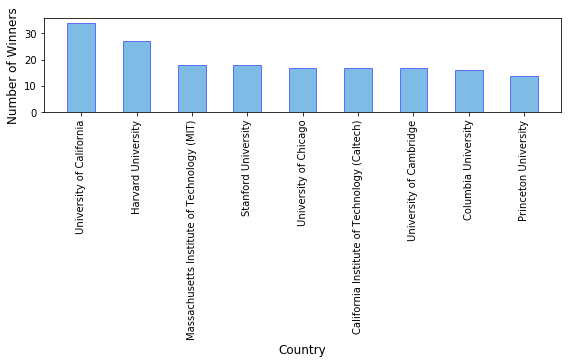

In [63]:
# Top organization names
para_1 = 'Organization Name'
bar_chart(df, para_1)


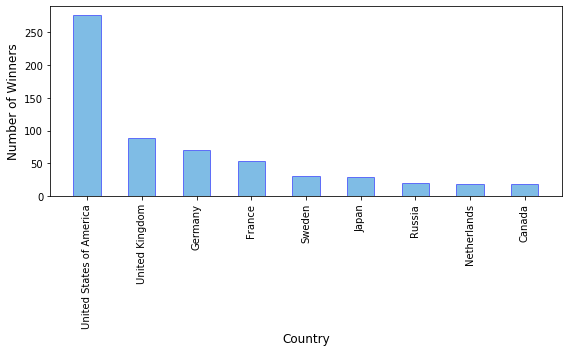

In [64]:
# Number of winners by Birth country
para_1 = 'Birth Country'
bar_chart(df, para_1)

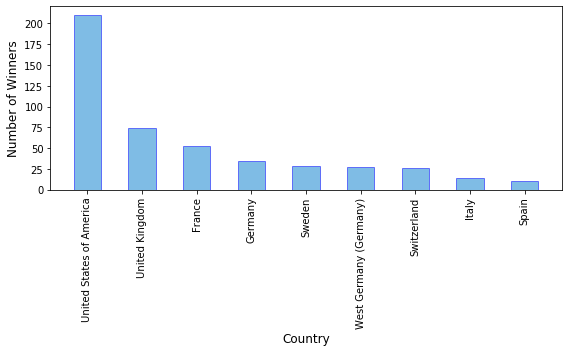

In [65]:
# Number of winners by Birth country
para_1 = 'Death Country'
bar_chart(df, para_1)

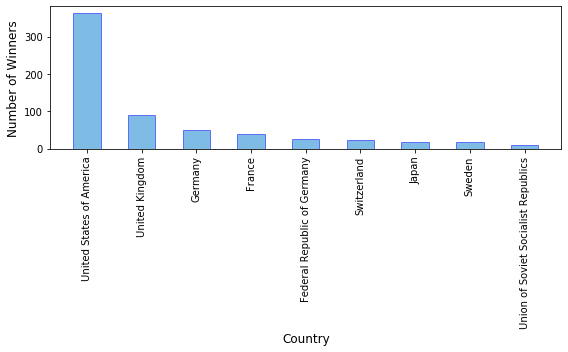

In [66]:
# Number of Winners by Organization country
para_1 = 'Organization Country'
bar_chart(df, para_1)

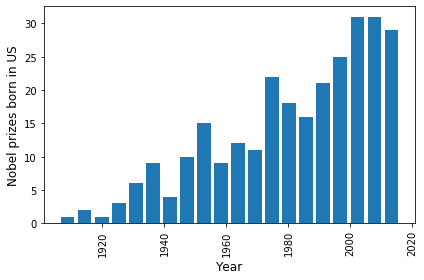

In [67]:

df_born_US = df[df['Birth Country'] == 'United States of America'];
plt.hist(df_born_US['Year'],bins=20, rwidth = 0.8)
plt.xlabel("Year",fontsize=12);
plt.ylabel("Nobel prizes born in US",fontsize=12);
plt.xticks(rotation = 90);
plt.tight_layout(); 
bar_output_plot = 'mitch_output/'+'Birth Country by decade' +'.png'
plt.savefig(bar_output_plot, dpi=300,bbox_inches='tight')

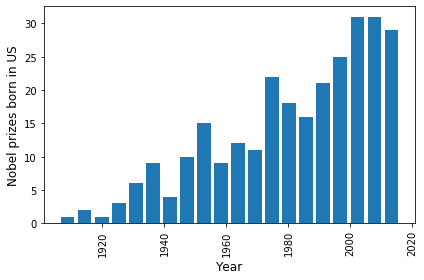

In [79]:
# Plot line of each countries growth over time
df_born_US = df[df['Birth Country'] == 'United States of America'];
plt.hist(df_born_US['Year'],bins=20, rwidth = 0.8)
plt.xlabel("Year",fontsize=12);
plt.ylabel("Nobel prizes born in US",fontsize=12);
plt.xticks(rotation = 90);
plt.tight_layout(); 
bar_output_plot = 'mitch_output/'+'Birth Country by decade' +'.png'
plt.savefig(bar_output_plot, dpi=300,bbox_inches='tight')

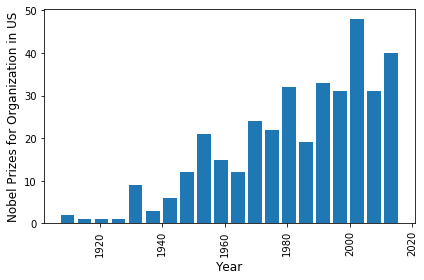

In [69]:
# Increase in Nobel prizes produced USA
df_org_city = df[df['Organization Country'] == 'United States of America'];
plt.hist(df_org_city['Year'],bins=20, rwidth = 0.8)
plt.xlabel("Year",fontsize=12);
plt.ylabel("Nobel Prizes for Organization in US",fontsize=12);
plt.xticks(rotation = 90);
plt.tight_layout(); 
bar_output_plot = 'mitch_output/'+'Org Country by decade' +'.png'
plt.savefig(bar_output_plot, dpi=300,bbox_inches='tight')

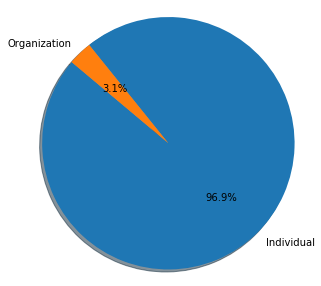

In [70]:
laureate_type = df['Laureate Type'].value_counts();
pies = laureate_type.index
pie_votes = laureate_type
plt.figure(figsize=(5,5))
plt.pie(pie_votes, labels=pies, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
laureate_type
bar_output_plot = 'mitch_output/'+'ORG or Individual PIE' +'.png'
plt.savefig(bar_output_plot, dpi=300,bbox_inches='tight')

In [71]:
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France


In [72]:
df_drop = df.dropna(subset=['Organization Country'])
df_drop

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1-Jan,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,2/10/1923,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1-Jan,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,7/15/1919,Berlin,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1-Jan,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,9/16/1932,Putney Heath,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,2016,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their contributions to contract theory""",2-Jan,936,Individual,Bengt Holmström,4/18/1949,Helsinki,Finland,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,NaN,NaN,NaN
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1-Jan,927,Individual,Yoshinori Ohsumi,2/9/1945,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",2-Jan,928,Individual,David J. Thouless,9/21/1934,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",4-Jan,929,Individual,F. Duncan M. Haldane,9/14/1951,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


In [73]:
df_drop.drop('Motivation', axis=1, inplace=True)

In [74]:
df_drop.head()

,Year,Category,Prize,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany
5,1901,Physics,The Nobel Prize in Physics 1901,1-Jan,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,2/10/1923,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,1-Jan,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,7/15/1919,Berlin,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,1-Jan,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,9/16/1932,Putney Heath,United Kingdom


In [75]:

# df_drop['Moved'] = df_drop['Organization Country'] 
for index, row in df_drop.iterrows():
    if (df_drop.loc[index,'Birth Country'] == df_drop.loc[index,'Organization Country']):
        df_drop.loc[index,'Moved'] = 'no'
    else:
        df_drop.loc[index,'Moved'] = 'yes'

        

In [76]:
df_drop.to_csv('df_drop.csv')

PermissionError: [Errno 13] Permission denied: 'df_drop.csv'

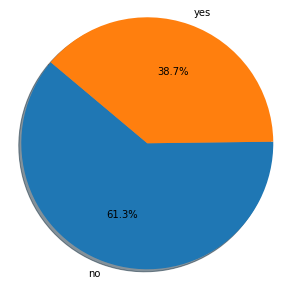

In [78]:
# People who moved or didnt move from the city they were born in. 

count_moved = df_drop['Moved'].value_counts();
pies = count_moved.index
pie_votes = count_moved
plt.figure(figsize=(5,5))
plt.pie(pie_votes, labels=pies, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
count_moved

moved_output = 'mitch_output/'+'moved,Unmoved' +'.png'
plt.savefig(moved_output, dpi=300,bbox_inches='tight')